In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# !pip install diffusers --upgrade

In [3]:
# !pip install -U diffusers transformers accelerate

In [4]:
# # !!pip install diffusers transformers accelerate safetensors
# !pip install numpy==1.26.4 --force-reinstall
# !pip install -U diffusers transformers accelerate safetensors peft




In [5]:
# from diffusers import DiffusionPipeline
# import torch
# # Load Hugging Face token from Kaggle Secrets
# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient()
# hf_token = user_secrets.get_secret("HF_TOKEN_")

# # Load SDXL
# pipe = DiffusionPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0",
#     torch_dtype=torch.float16,
#     use_auth_token=hf_token,
# ).to("cuda")

# prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
# image = pipe(prompt).images[0]
# image

In [6]:
# !pip install huggingface_hub


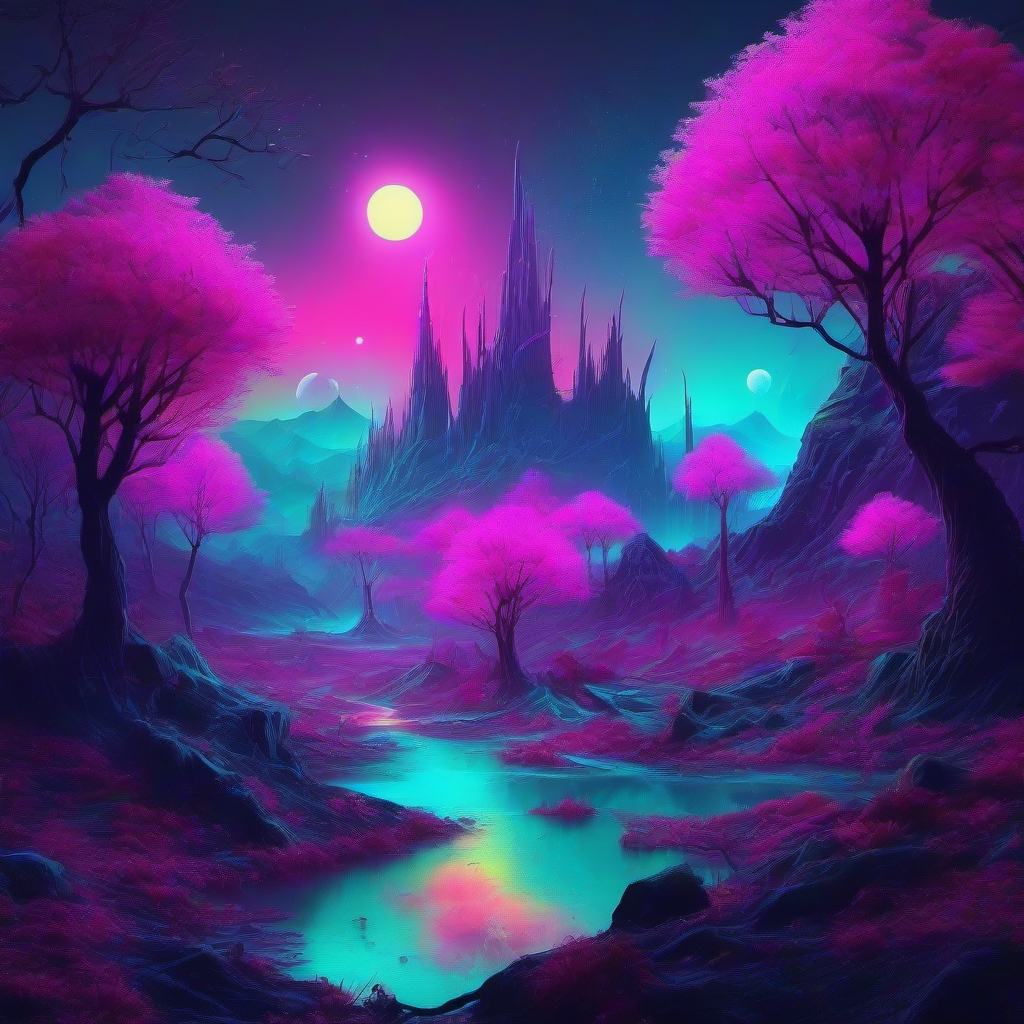

In [7]:
import io
from huggingface_hub import InferenceClient
from IPython.display import display, Image
from kaggle_secrets import UserSecretsClient


user_secrets = UserSecretsClient()
hf_token = user_secrets.get_secret("HF_TOKEN_")
 


client = InferenceClient(
    "stabilityai/stable-diffusion-xl-base-1.0",
    token = hf_token
)

prompt = "a beautiful fantasy landscape with neon trees"

result = client.text_to_image(prompt)

# Convert PIL Image to bytes
buf = io.BytesIO()
result.save(buf, format="PNG")
buf.seek(0)

# show image
display(Image(data=buf.read()))
